In [54]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [107]:
def show_anns(anns):
    ans = 0
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        ans += 1
        m = ann['segmentation']
        # color_mask = np.concatenate([np.random.random(3), [0.35]])
        color_mask = np.array([0, 0, 0, 1])
        img[m] = color_mask
        if ans==1: break
    # ax.imshow(img)

    return img

In [99]:
# image = cv2.imread('/Users/kevinbuhler/Code/imagine/frames/frame_0.png')
image = cv2.imread('/Users/kevinbuhler/Code/imagine/IMG_5298.jpg')

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

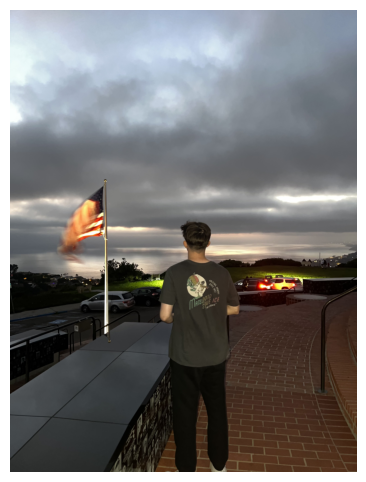

In [100]:
plt.figure(figsize=(6,6))
plt.imshow(image)
plt.axis('off')
plt.show()

In [101]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

# /Users/kevinbuhler/Code/imagine/research/segment-anything/segment_anything/sam_vit_b_01ec64.pth
sam_checkpoint = "/Users/kevinbuhler/Code/imagine/research/segment-anything/segment_anything/sam_vit_b_01ec64.pth"
model_type = "vit_b"

device = "cpu"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)

In [102]:
masks = mask_generator.generate(image)

In [103]:
# print(len(masks))
# print(masks)
# print(masks[0])
# print(masks[0].keys())

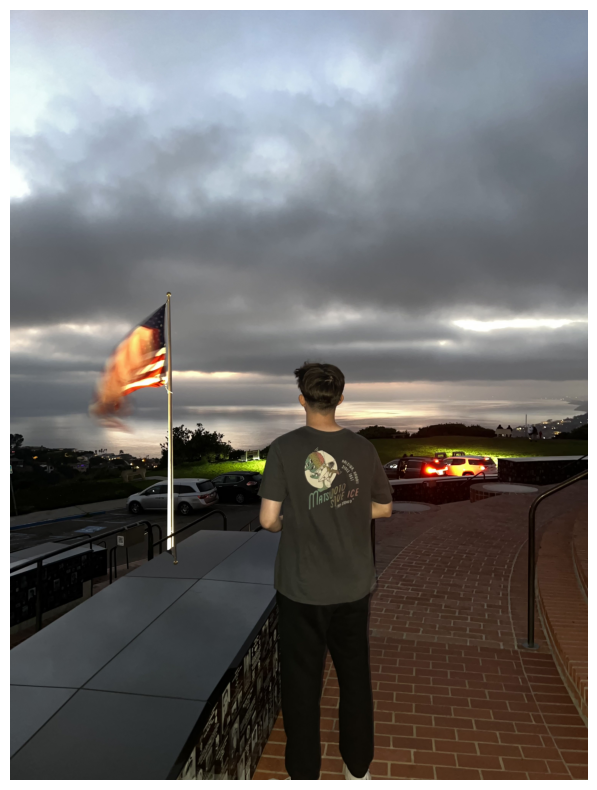

In [108]:
plt.figure(figsize=(10,10))
plt.imshow(image)
# print(masks[0]['segmentation'])
mask = show_anns(masks)
plt.axis('off')
plt.show() 

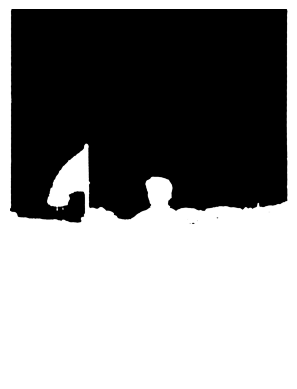

In [109]:
plt.imshow(mask)
plt.axis('off')
plt.show()